In [1]:
#import necessary packages: pandas, matplotlib, seaborn, and sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#change to seaborn's color style
sns.set(color_codes = True)

#remove output warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import data
#source: https://archive.ics.uci.edu/ml/datasets/abalone
abalones = pd.read_csv('https://raw.githubusercontent.com/lwpondscum/CIS9660_Lab_3/main/abalone_with_headers.csv')

In [3]:
#preview data
abalones.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
#preview data
abalones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


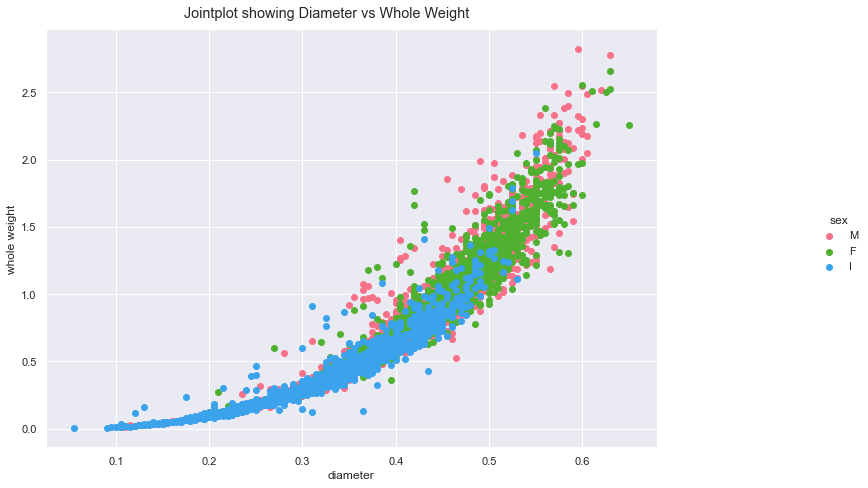

In [5]:
#creates a joint plot of diameter vs whole weight colored by sex
rp = sns.FacetGrid(abalones, hue = 'sex', palette = 'husl').map(plt.scatter, 'diameter', 'whole weight').add_legend()
rp.fig.suptitle('Jointplot showing Diameter vs Whole Weight')
plt.gcf().set_size_inches(15, 8)
plt.show()

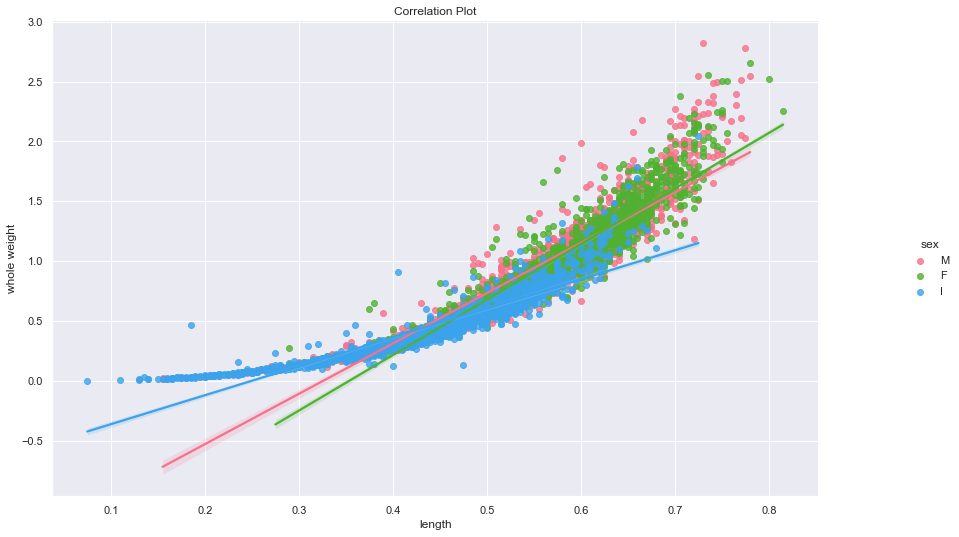

In [6]:
#creates a lineplot of length vs whole weight with line of best fit
sns.lmplot(x = 'length', y = 'whole weight', data = abalones, hue = 'sex', palette = 'husl').set(title = "Correlation Plot")
plt.gcf().set_size_inches(15, 8)
plt.show()

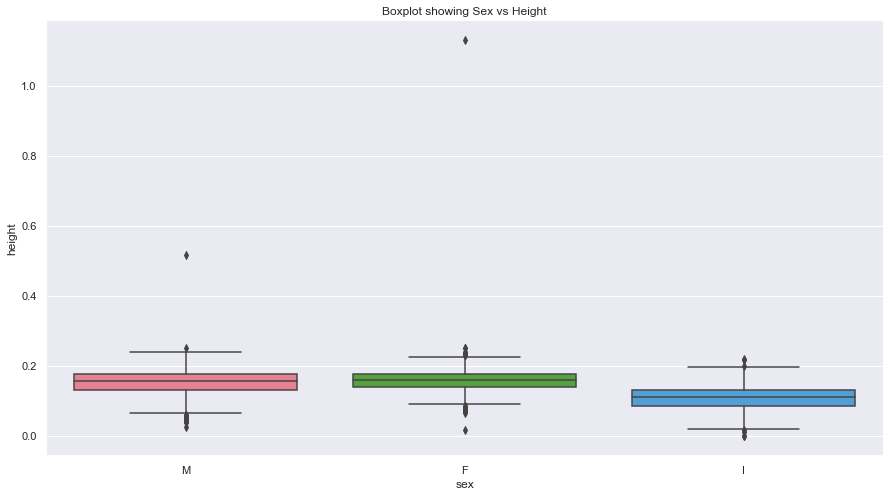

In [7]:
#creates a boxplot of height sorted by sex
sns.boxplot(x='sex', y='height', palette='husl', data = abalones).set(title='Boxplot showing Sex vs Height')
plt.gcf().set_size_inches(15, 8)
plt.show()

In [8]:
#encodes the categorical variable of sex and drops sex from the data frame
abalones_encoding = pd.get_dummies(abalones['sex'])
abalones_mod = abalones.drop('sex', axis = 1)

In [9]:
#joins the encoded data with the data frame
abalones_mod = abalones_mod.join(abalones_encoding)

In [10]:
#creates a correlation matrix for the dataset
abalones_mod.corr()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,F,I,M
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.309666,-0.551465,0.236543
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.318626,-0.564315,0.240376
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.298421,-0.518552,0.215459
whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.299741,-0.557592,0.252038
shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.263991,-0.521842,0.251793
viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.308444,-0.556081,0.242194
shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.306319,-0.546953,0.235391
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,0.250279,-0.436063,0.181831
F,0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,0.250279,1.000000,-0.464298,-0.512528
I,-0.551465,-0.564315,-0.518552,-0.557592,-0.521842,-0.556081,-0.546953,-0.436063,-0.464298,1.000000,-0.522541


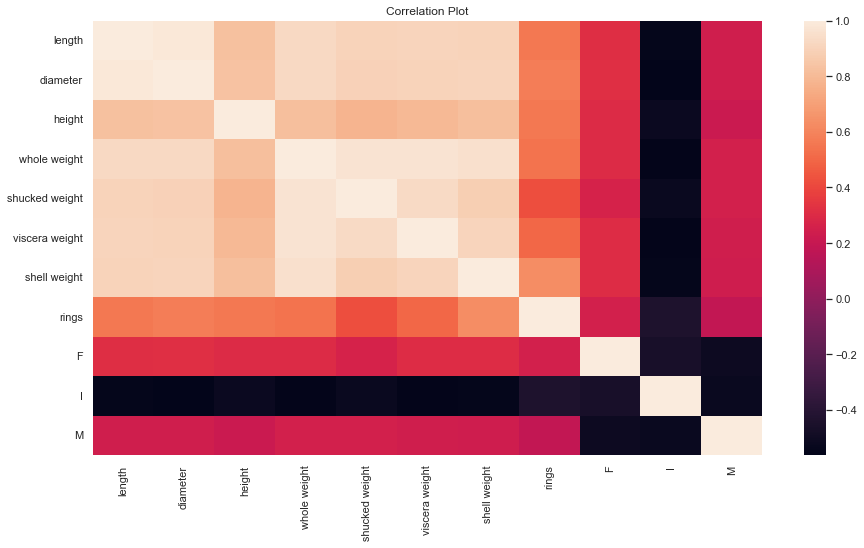

In [11]:
#creates heatmap for dataset
sns.heatmap(abalones_mod.corr())
plt.title('Correlation Plot')
plt.gcf().set_size_inches(15, 8)
plt.show()

In [12]:
abalones_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   length          4177 non-null   float64
 1   diameter        4177 non-null   float64
 2   height          4177 non-null   float64
 3   whole weight    4177 non-null   float64
 4   shucked weight  4177 non-null   float64
 5   viscera weight  4177 non-null   float64
 6   shell weight    4177 non-null   float64
 7   rings           4177 non-null   int64  
 8   F               4177 non-null   uint8  
 9   I               4177 non-null   uint8  
 10  M               4177 non-null   uint8  
dtypes: float64(7), int64(1), uint8(3)
memory usage: 273.4 KB


In [13]:
#creates training and test sets of .70 to .30 ratio
X = abalones_mod.drop(['rings'], axis = 1)
y = abalones_mod['rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 91)

In [14]:
#perform standardization on X sets
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
#creates K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [16]:
#creates Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

GaussianNB()

In [17]:
#cross-validate KNN model
folds = KFold(n_splits = 5)
result1 = cross_val_score(knn, X_train, y_train.ravel(), cv = folds, scoring = 'accuracy')
 
print(f' Avg accuracy:{result1.mean()}')

 Avg accuracy:0.21175740545603555


In [18]:
#cross-validate GNB model
result2 = cross_val_score(gnb, X_train, y_train.ravel(), cv = folds, scoring = 'accuracy')

print(f' Avg accuracy:{result1.mean()}')

 Avg accuracy:0.21175740545603555


In [19]:
#have models predict test set
y_pred_knn = knn.predict(X_test)
y_pred_gnb = gnb.predict(X_test)

In [20]:
#classification report for KNN
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           3       0.20      0.25      0.22         4
           4       0.50      0.53      0.51        17
           5       0.29      0.27      0.28        33
           6       0.21      0.29      0.24        73
           7       0.26      0.33      0.29       111
           8       0.24      0.28      0.25       170
           9       0.21      0.22      0.21       234
          10       0.16      0.22      0.19       178
          11       0.18      0.20      0.19       134
          12       0.13      0.08      0.10        87
          13       0.11      0.05      0.06        66
          14       0.21      0.09      0.12        35
          15       0.00      0.00      0.00        28
          16       0.33      0.04      0.07        25
          17       0.00      0.00      0.00        16
          18       0.00      0.00      0.00        11
          19       0.00      0.00      0.00        15
          20       0.00    

In [21]:
#classification report for GNB
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           3       0.21      0.75      0.33         4
           4       0.20      0.59      0.30        17
           5       0.08      0.09      0.09        33
           6       0.25      0.33      0.28        73
           7       0.19      0.30      0.23       111
           8       0.28      0.25      0.26       170
           9       0.32      0.04      0.08       234
          10       0.00      0.00      0.00       178
          11       0.00      0.00      0.00       134
          12       0.00      0.00      0.00        87
          13       0.00      0.00      0.00        66
          14       0.00      0.00      0.00        35
          15       0.00      0.00      0.00        28
          16       0.00      0.00      0.00        25
          17       0.00      0.00      0.00        16
          18       0.00      0.00      0.00        11
          19       0.00      0.00      0.00        15
          20       0.00    

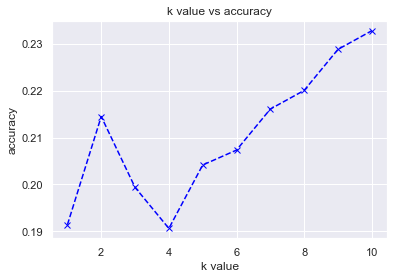

In [28]:
#experiment based on accuracy of KNN algorithm, based on code by Prof. Jairam
accuracy = []

for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train.ravel())
  y_pred = knn.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred.ravel()))
plt.plot(list(range(1,11)), accuracy, color='blue', linestyle='dashed', marker='x')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.title('k value vs accuracy')
plt.show()